<h1 style="text-align:center;">COMP6940 Assignment 1: Data Visualization</h1>
<h4>Kevan Lee Lum</h4>
<h4>Due Date: 28 Feb 2018</h4>

<p>This assignment is about analyzing a dataset on mental health. We start with importing the usual modules. </p>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

<h2>1. Load and explore/describe dataset</h2>

In [2]:
df = pd.read_csv("survey.csv")

In [3]:
df.shape

(1259, 27)

<p>There are 27 columns with 1259 rows. That's a good bit of rows.</p>

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

<p>Most of the data types are objects, suggesting mostly qualitative data. Check the first few rows of the data to get a better look.</p>

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<p>There are some NaN values in the table. Count how many NaNs there are so we know how to handle the <span style="color:red;">SITUATION</span>. First, check for any completely empty columns.</p>

In [6]:
all_nan = df.columns[df.isnull().all()]
len(list(all_nan))

0

<p>Nope there's no completely empty columns. Let's identify the columns with NaN values.</p>

In [7]:
any_nan = df.columns[df.isnull().any()]
any_nan

Index(['state', 'self_employed', 'work_interfere', 'comments'], dtype='object')

<p>There are four columns with NaN values. How much NaN does each column have?</p>

In [8]:
nan_list = any_nan.tolist()
for col in nan_list:
    print('There are {} NaN values in {}'.format(df[col].isnull().sum(), col))

There are 515 NaN values in state
There are 18 NaN values in self_employed
There are 264 NaN values in work_interfere
There are 1095 NaN values in comments


<p>There are a lot of NaN values in the comments column, but maybe that one is not so important for analysis. There are a lot of NaNs for state. Maybe that suggests that there are many participants not from the US? Work_interfere has 264 NaNs and self_employed has 18. We will forget about addressing the NaNs for now until one of these columns is needed for analysis. Hope that's ok.</p><br>
<h2>2. Age Distribution</h2> 
<p>The Age column would probably be useful here and we see that's its an int data type. Nice, let's describe it and draw the histogram.</p>

In [9]:
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

<p>Well that gives some weird values. We don't expect anybody to be less than 0 or greater than 120, so let's try and find what's skewing the results.</p> 

In [10]:
df[(df.Age < 0)|(df.Age > 120)].count()

Timestamp                    5
Age                          5
Gender                       5
Country                      5
state                        3
self_employed                5
family_history               5
treatment                    5
work_interfere               4
no_employees                 5
remote_work                  5
tech_company                 5
benefits                     5
care_options                 5
wellness_program             5
seek_help                    5
anonymity                    5
leave                        5
mental_health_consequence    5
phys_health_consequence      5
coworkers                    5
supervisor                   5
mental_health_interview      5
phys_health_interview        5
mental_vs_physical           5
obs_consequence              5
comments                     1
dtype: int64

<p>There are 5 rows that contain wonky age values. Can't replace with the mean since the mean is thrown off by the outliers. Since 5 rows out of 1259 seems insignificant, let's just throw them out by creating a new data frame :)</p>

In [11]:
valid_ages = df[(df.Age > 0) & (df.Age < 120)]
valid_ages.describe()

,Age
count,1254.000000
mean,32.019139
std,7.375005
min,5.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


<p>Good this looks more reasonable. We can see that the 5 rows were thrown out and the mean age is about 32. Now for the histogram</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C59A602F60>]], dtype=object)

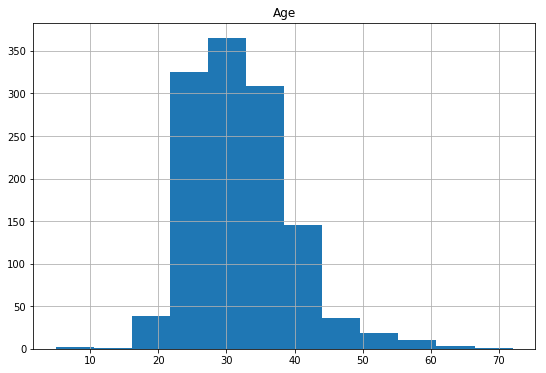

In [12]:
valid_ages.hist(figsize=(9,6), bins=12)

<p>Looks like a normal-ish distribution to me. That would make a lot of people happy.</p>

<h2>3. Top countries where mental health is prevalent</h2>
<p>Not sure how to answer this one. I think that this answer would be heavily based on how the survey was distributed. I guess this should be a plot of the countries that participated in the study. A bar graph can show the amount of answers from each country. StackOverflow suggests using the value_counts method.</p>

In [13]:
df['Country'].describe()

count              1259
unique               48
top       United States
freq                751
Name: Country, dtype: object

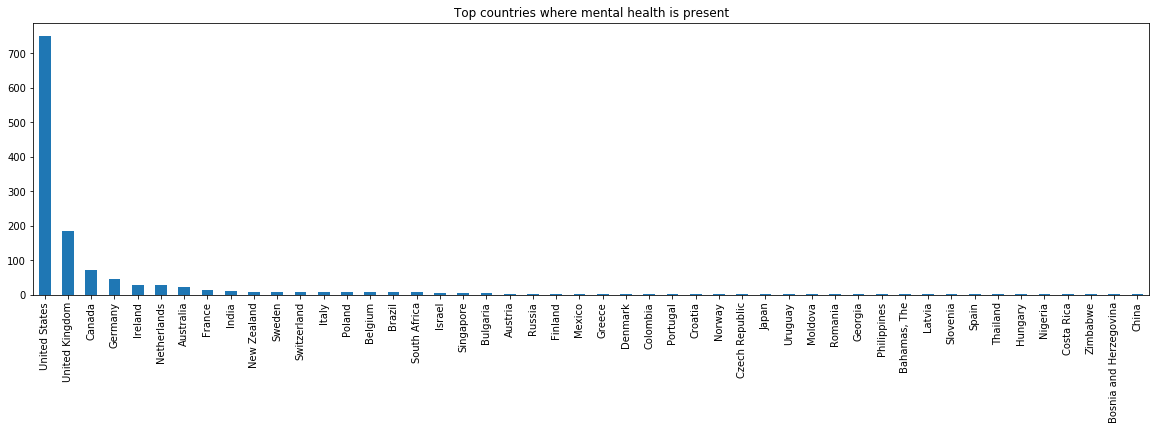

In [14]:
pd.value_counts(df['Country']).plot.bar(figsize=(20,5), title="Top countries where mental health is present")

<p>As expected, the majority of the people that answered the survey are from the United States, but this may just be because that audience was easier to reach, not necessarily because there are more cases of mental health issues.</p><br>
<h2>4. People with mental health who have a family history with mental health</h2>
<p>The family_history column would be good here. Could this be combined with question 5? I don't see why it has to be separated. Anyway here's a pie chart.</p>

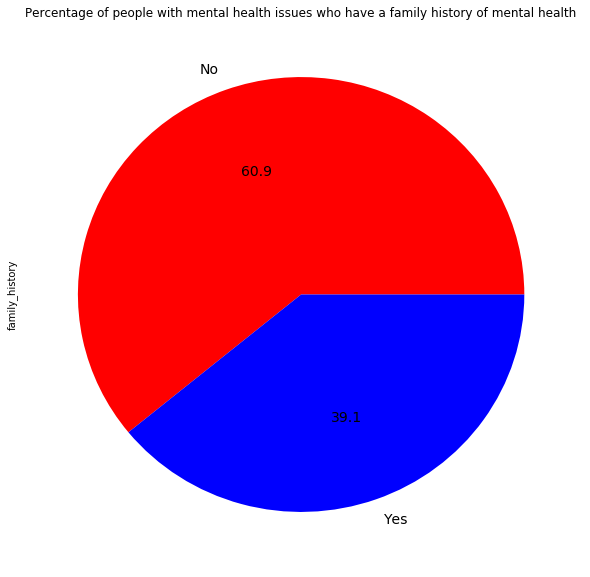

In [15]:
pd.value_counts(df['family_history']).plot.pie(figsize=(10,10), colors=['r', 'b'], autopct='%.1f', fontsize=14, title='Percentage of people with mental health issues who have a family history of mental health')

<p>We see that approximately 60% of the respondants have no family history of mental health problems.</p><br>
<h2>6. Do companies that consider mental health as seriously as physical health provide any benefits for mental health issues?</h2>
<p>The benefits column should be useful here. This sounds like another pie chart opporunity. First, we need to determine how much companies consider mental health issues as seriously as physical health issues. The mental_vs_physical should be helpful.</p> 

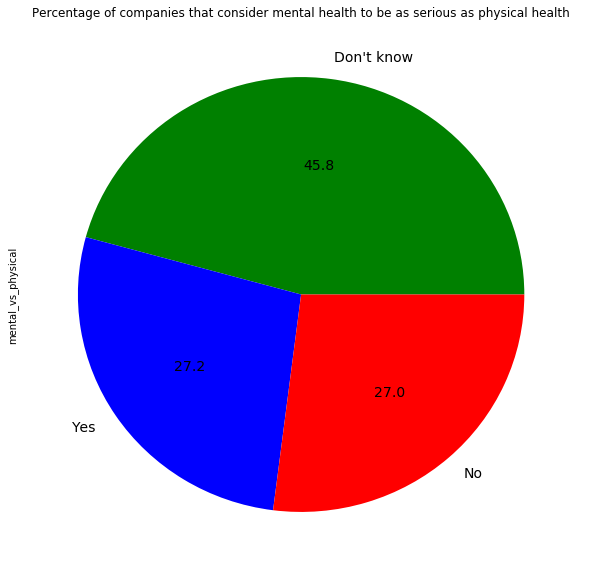

In [16]:
pd.value_counts(df['mental_vs_physical']).plot.pie(figsize=(10,10), colors=['g', 'b', 'r'], autopct='%.1f', fontsize=14, title='Percentage of companies that consider mental health to be as serious as physical health')

<p>Almost half of the respondants don't know if their employers consider mental health to be as serious as physical health, which is reasonable. I don't know if my employer is serious about anything. We now need to extract the 'Yes' rows, which is only 27.2% or the respondants. We will make a new dataframe to hold these people.</p>

In [17]:
serious_comp = df.loc[df['mental_vs_physical'] == 'Yes']
serious_comp.describe()

,Age
count,343.000000
mean,31.498542
std,7.775308
min,-1.000000
25%,27.000000
50%,31.000000
75%,35.000000
max,65.000000


<p>A new data frame was created with only 343 rows, which is the 27.2% expected. Now for the pie chart of benefits.</p>

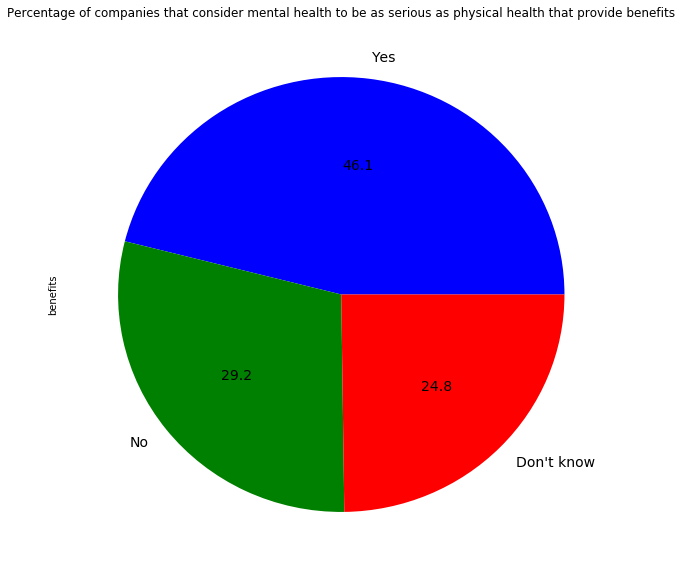

In [18]:
pd.value_counts(serious_comp['benefits']).plot.pie(figsize=(10,10), colors=['b', 'g', 'r'], autopct='%.1f', fontsize=14, title='Percentage of companies that consider mental health to be as serious as physical health that provide benefits')

<p>We see that almost half of the companies that consider mental health to be as serious as physical health do provide benefits to their employees. Maybe those people who don't know should find out, or maybe they aren't interested in getting help.</p>
<h2>7. Do companies that consider mental health as seriously as physical health allow employees to take leave because of mental health?</h2>
<p>Luckily we can use the same serious_comp df that we made in the previous question and pie chart it up using the leave column</p>

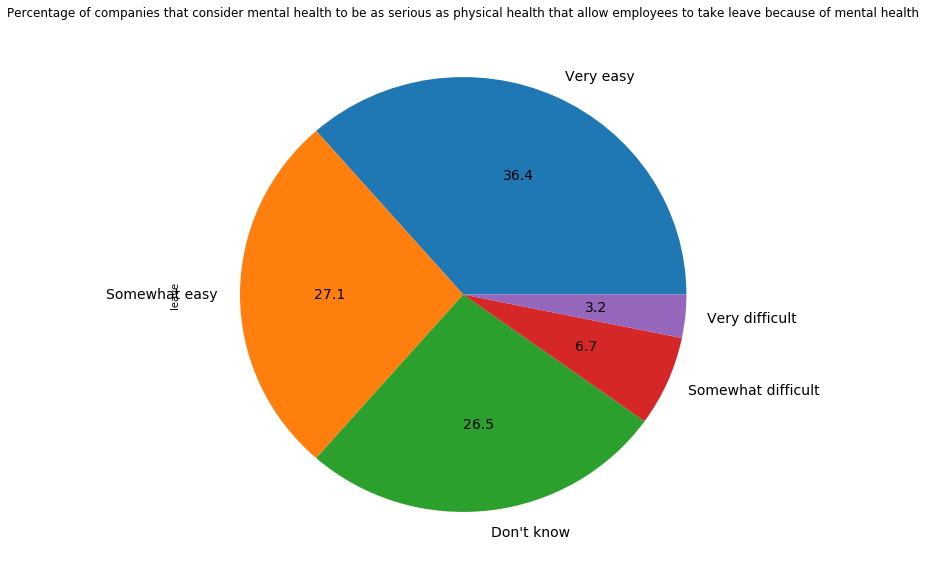

In [19]:
pd.value_counts(serious_comp['leave']).plot.pie(figsize=(10,10), autopct='%.1f', fontsize=14, title='Percentage of companies that consider mental health to be as serious as physical health that allow employees to take leave because of mental health')

<p>We see that the majority have an easy time taking leave because of mental health issues, with about 10% saying that it is very difficult. Those people probably like the benefits.</p><br>
<h2>8. People with mental health issues that receive treatment.</h2>
<p>The treatment column would be used here. Hope you're not getting tired of the pie charts. I also feel this can be combined with question 9</p>

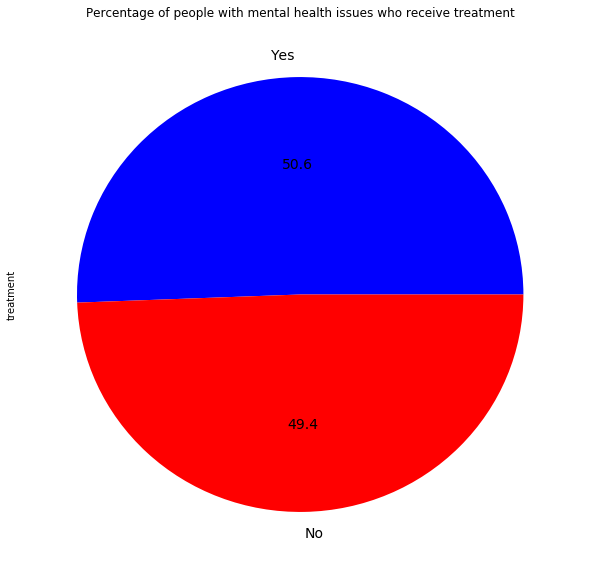

In [20]:
pd.value_counts(df['treatment']).plot.pie(figsize=(10,10), colors=['b', 'r'], autopct='%.1f', fontsize=14, title='Percentage of people with mental health issues who receive treatment')

<p>This is almost split halfway. Can't make any robust conclusions from that.</p><br>
<h2>10. Does work have part to play with employee's mental health</h2>
<p>The work_interfere column should be used here? I am not sure since the work_interfere column refers to people who's mental issues affect their health. Otherwise this question is unanswerable because the dataset is made up of only people with mental health. Anyway, the work_interfere has NaN values (264 from line 8, which is a significant amount), so how to deal with them? Its not a quantitative value so the mean cannot be inserted, and I also wouldn't feel comfortable inserting the same value in so many rows. Maybe it is just best to overlook the NaN values and plot what data we have. Another pie chart on the way.</p>

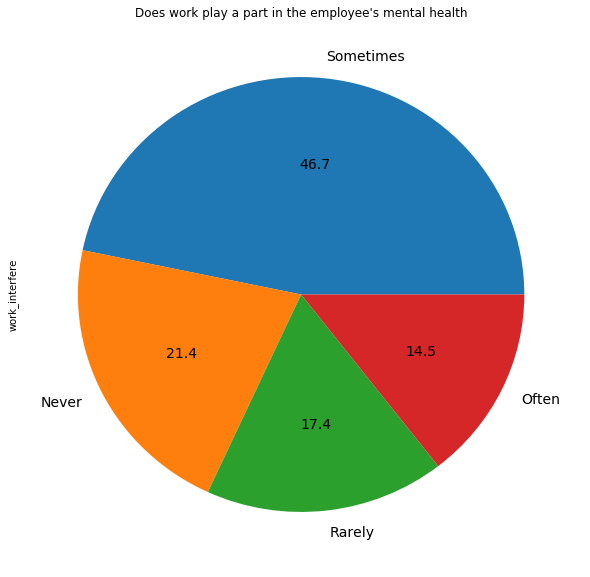

In [21]:
pd.value_counts(df['work_interfere']).plot.pie(figsize=(10,10), autopct='%.1f', fontsize=14, title="Does work play a part in the employee's mental health")

<p>As shown, mental health does affect their work, which is not quite what the question asked. Oh well. We would expect stronger support for this statement if more people had responded to the question.</p>
<p>Usually I'm not a fan of so many pie charts, but I suppose there's not much other alternatives with qualitative data.</p>